##### Import required libraries

In [1]:
from kafka import KafkaConsumer
from json import loads
import json
from io import StringIO
import pandas as pd
import ast
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import geopandas as gpd
import plotly.express as px
import pandas as pd
import time

##### Creating kafka consumer

In [17]:
if __name__ == '__main__':
    consumer = KafkaConsumer('messages',bootstrap_servers = ['localhost:9092']) # creating KafkaConsumer
    df = pd.DataFrame() 
    time_ends = time.time() + 60 *60 # data fetching for an hour 
    for message in consumer:
        data_json = json.loads(message.value) # Loading data from kafka producer
        data = data_json['iss_position']  # converting to json
        data_normalized = pd.json_normalize(data) # normalizing json data
        df2 = pd.DataFrame(data_normalized) # creating dataframe for normalized data
        df = df.append(df2) # appneding to the empty dataframe     
        if time.time()> time_ends: 
            break

In [35]:
df

,Latitude,Longitude
0,-51.5828,113.0
1,-51.5828,113.0
2,-51.5842,113.0
3,-51.5842,113.0
4,-51.5855,113.0
...,...,...
716,-51.0208,128.0
717,-51.0156,128.0
718,-51.0156,128.0
719,-51.0156,128.0


In [40]:
x=df['Longitude']
y=df['Latitude']

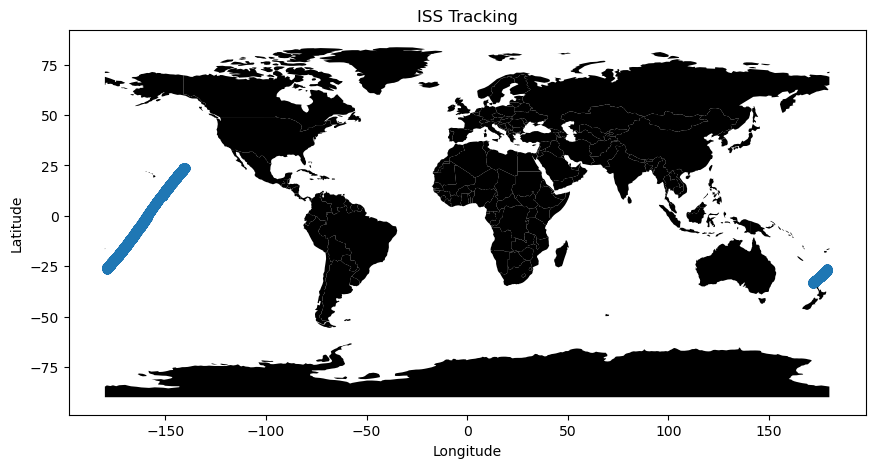

In [50]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 5))
worldmap.plot(color="black", ax=ax)   
plt.scatter(x, y)
plt.title("ISS Tracking")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

reference: https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3